# Usage Example: Pydantic

This notebook shows an example of using erdantic with [Pydantic](https://pydantic-docs.helpmanual.io/) models.

Let's take a look at the models from the `erdantic.examples.pydantic` module. Here's their source code for clariy.

In [1]:
import erdantic.examples.pydantic
??erdantic.examples.pydantic

Type:        module
String form: <module 'erdantic.examples.pydantic' from '/Users/jqi/repos/erdantic/erdantic/examples/pydantic.py'>
File:        ~/repos/erdantic/erdantic/examples/pydantic.py
Source:     
"""Example data model classes using [Pydantic](https://pydantic-docs.helpmanual.io/)."""

from datetime import datetime
from enum import Enum
from typing import List, Optional

from pydantic import BaseModel


class Alignment(str, Enum):
    LAWFUL_GOOD = "lawful_good"
    NEUTRAL_GOOD = "neutral_good"
    CHAOTIC_GOOD = "chaotic_good"
    LAWFUL_NEUTRAL = "lawful_neutral"
    TRUE_NEUTRAL = "true_neutral"
    CHAOTIC_NEUTRAL = "chaotic_neutral"
    LAWFUL_EVIL = "lawful_evil"
    NEUTRAL_EVIL = "neutral_evil"
    CHAOTIC_EVIL = "chaotic_evil"


class Adventurer(BaseModel):
    """A person often late for dinner but with a tale or two to tell.

    Attributes:
        name (str): Name of this adventurer
        profession (str): Profession of this adventurer
        level (int): Leve

## Using the CLI

The fastest way to rendering a diagram is to use the command-line interface. Below we use IPython's `!` to run a command in the system shell. We pass the full dotted path to the root class of our composition hierarchy, along with an output file path. erdantic will walk the composition graph to find all child classes. 

In [2]:
!erdantic erdantic.examples.pydantic.Party -o diagram.png

Rendered diagram to diagram.png


The format rendered is inferred from the file extension.

## Using the Python library

You can also use the erdantic Python library, which lets you inspect the diagram object. The diagram object even automatically renders in Jupyter notebooks as demonstrated below. 

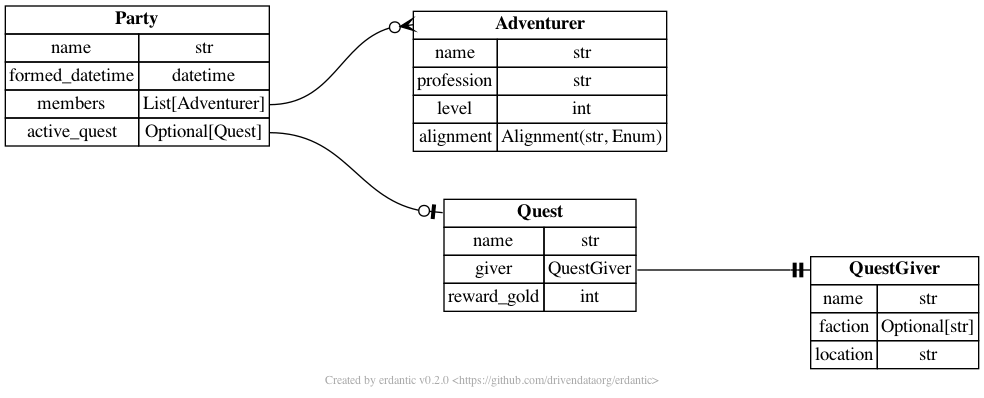

In [3]:
import erdantic as erd
from erdantic.examples.pydantic import Party


diagram = erd.create(Party)
diagram

In [4]:
diagram.models

[PydanticModel(Adventurer),
 PydanticModel(Party),
 PydanticModel(Quest),
 PydanticModel(QuestGiver)]

In [5]:
diagram.edges

[Edge(source=PydanticModel(Party), source_field=<PydanticField: 'members', List[Adventurer]>, target=PydanticModel(Adventurer)),
 Edge(source=PydanticModel(Party), source_field=<PydanticField: 'active_quest', Optional[Quest]>, target=PydanticModel(Quest)),
 Edge(source=PydanticModel(Quest), source_field=<PydanticField: 'giver', QuestGiver>, target=PydanticModel(QuestGiver))]

You can use the `draw` method to render the diagram to disk.

In [6]:
diagram.draw("pydantic.svg")

# Equivalently, use erd.draw directly from Party
# erd.draw(Party, out="pydantic.svg")

erdantic uses [Graphviz](https://graphviz.org/), a venerable open-source C library, to create the diagram. Graphviz uses the [DOT language](https://graphviz.org/doc/info/lang.html) for describing graphs. You use the `to_dot` method to get the DOT representation as a string. 

In [7]:
print(diagram.to_dot())

# Equivalently, use erd.to_dot directly from Party
assert diagram.to_dot() == erd.to_dot(Party)

digraph "Entity Relationship Diagram" {
	graph [fontcolor=gray66,
		fontsize=9,
		label="Created by erdantic v0.2.0 <https://github.com/drivendataorg/erdantic>",
		nodesep=0.5,
		rankdir=LR,
		ranksep=1.5
	];
	node [fontsize=14,
		label="\N",
		shape=plain
	];
	"erdantic.examples.pydantic.Adventurer"	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Adventurer</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>profession</td><td port="profession">str</td></tr><tr><td>level</td><td port="level">int</td></tr><tr><td>alignment</td><td port="alignment">Alignment(str, Enum)</td></tr></table>>,
		tooltip="erdantic.examples.pydantic.Adventurer&#xA;&#xA;A person often late for dinner but with a tale or two to tell.&#xA;&#xA;Attributes:&#\
xA;    name (str): Name of this adventurer&#xA;    profession (str): Profession of this adventurer&#xA;    level (int): Level of \
this adventurer&#xA;    alignment (Alignment): Alignment of this adve

## Terminal Models

If you have an enormous composition graph and want to chop it up, you can make that work by specifying models to be terminal nodes.

For the CLI, use the `-t` option to specify a model to be a terminus. To specify more than one, used repeated `-t` options. So, for example, if you want one diagram rooted by `Party` that terminates at `Quest`, and another diagram that is rooted by `Quest`, you can use the following two shell commands.

```bash
erdantic erdantic.examples.pydantic.Party \ 
    -t erdantic erdantic.examples.pydantic.Quest \
    -o party.png
erdantic erdantic.examples.pydantic.Quest -o quest.png
```

When using the Python library, pass your terminal node in a list to the `termini` keyword argument. Below is the Python code for creating diagrams equivalent to the above shell commands.

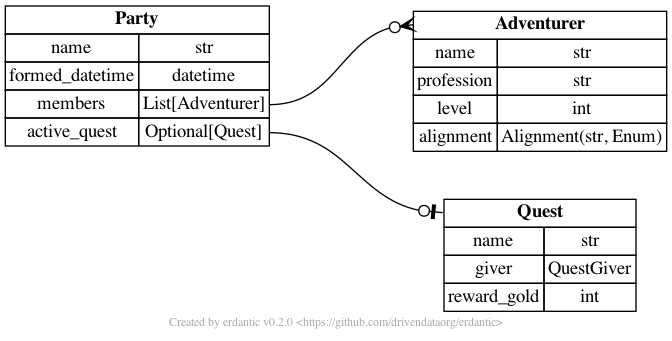

In [8]:
from erdantic.examples.pydantic import Quest


erd.create(Party, termini=[Quest])

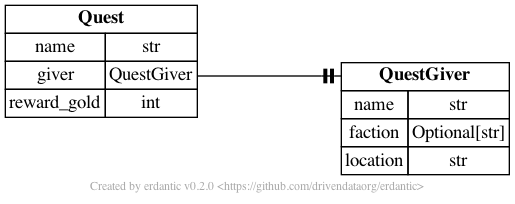

In [9]:
erd.create(Quest)